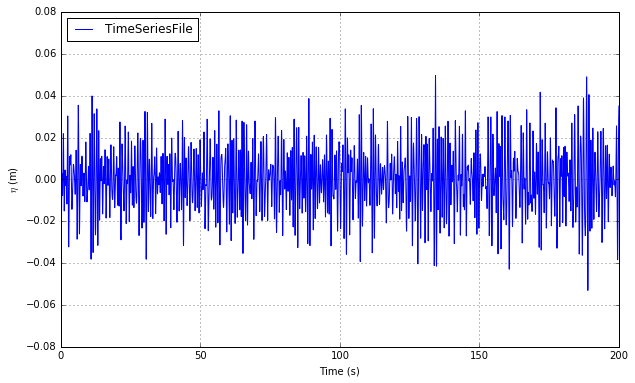

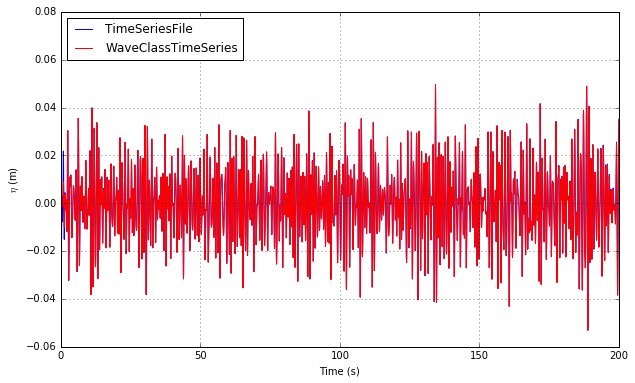

('Time for Random Wave class:', 119.55734102963129)
('Time for Timeseries class:', 18.826076175739672)


In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import imp
#The paths in the two following lines need to be changed, depending on the location of the modules
#The notebook will work with the following commits:
#WaveTools.py: https://github.com/erdc-cm/proteus/commit/5db78fc77b50e26540188bef890259437c83ef4d
#Profiling.py: https://github.com/erdc-cm/proteus/commit/9f4c66a59414f97861246f6fd66214ac67d849d1
Profiling = imp.load_source('Profiling', 'C:/Users/asd/Desktop/WaveTools_nb/Profiling.py')
WT = imp.load_source('WaveTools', 'C:/Users/asd/Desktop/WaveTools_nb/WaveTools.py')
import numpy as np
import time


Tp = 1.
Hs = 0.062
mwl = 0.47
depth = 0.47
g = np.array([0., -9.81, 0])
N = 2001
bandFactor = 2.0
spectName = "PM_mod"
spectral_params = None
phi = None
waveDir = np.array([1., 0., 0.])


#Calling the class
RW = WT.RandomWaves(Tp,
                 Hs,
                 mwl,
                 depth,
                 waveDir,
                 g,
                 N,
                 bandFactor,
                 spectName,
                 spectral_params,
                 phi
                )

nperiod = 1000
npoints = 25
n = npoints * nperiod
tnlist=np.linspace(0,nperiod*Tp,n)
eta_t = np.zeros(len(tnlist),)

x = np.array([0., 0., 0.])

#Calculating time series
t1  =-time.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_t[i] = RW.eta(x, t)
t1 = t1 + time.clock()
    
    
plt.figure(4, figsize=(10,6), dpi=100)
plt.plot(tnlist, eta_t, color='blue', label="TimeSeriesFile")
plt.xlim(0, 200*Tp)
plt.ylim(-0.08,0.08)
plt.xlabel("Time (s)", size=10)
plt.ylabel("$\eta$ (m)", size=10)
plt.legend(loc='upper left')
plt.grid()
plt.show()

np.savetxt("MaseKirbySeries.txt",zip(tnlist,eta_t))


#Setting up wave properties
timeSeriesFile="MaseKirbySeries.txt"
skiprows=0
N=32
rec_direct=False
window_params=None
timeSeriesPosition=[0., 0., 0.]




#Calling the class
TS = WT.TimeSeries(timeSeriesFile,
                skiprows,
                timeSeriesPosition,
                depth,
                N,
                mwl,
                waveDir,
                g,
                rec_direct,
                window_params = {"Nwaves":10,"Tm":Tp/1.1,"Window":"costap"},
                cutoffTotal = 2./1000.
                )


#Setting up a time interval of n periods (using npoints sampling points per period)
eta_ts = np.zeros(len(tnlist),)
uVel_ts = np.zeros(len(tnlist),)


#Calculating time series
t2 = -time.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_ts[i] = TS.etaWindow(x, t)
    uVel_ts[i] = TS.uWindow(x, t)[0]
t2 = t2 +  time.clock()

#Plotting both time series from time series file and wave class
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(tnlist, eta_t, color='blue', label="TimeSeriesFile")
plt.plot(tnlist, eta_ts, color='red', label="WaveClassTimeSeries")
plt.xlim(0, 200*Tp)
plt.xlabel("Time (s)", size=10)
plt.ylabel("$\eta$ (m)", size=10)
plt.legend(loc='upper left')
plt.grid()
plt.show()


"""#Plotting the x-component 0f velocity
plt.figure(2, figsize=(10,6), dpi=100)
plt.plot(tnlist, uVel_ts)
plt.xlim(0, 10*nperiod)
plt.xlabel("Time (s)", size=10)
plt.ylabel("u (m/s)", size=10)
plt.grid()
plt.show()"""
print ("Time for Random Wave class:",t1)
print ("Time for Timeseries class:",t2)